<a href="https://colab.research.google.com/github/Nargis45/Regression-techniques/blob/master/Imbalanced_dataset_under_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imbalanced-learn  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
%matplotlib inline

# display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [3]:
#mounting the drive to import the file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
columns=df.columns.tolist()
columns=[c for c in columns if c not in ['Class']]
target='Class'
state=np.random.RandomState(42)
X=df[columns]
y=df[target]
X_outliers=state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


# **Exploratory Data Analysis**

In [11]:
df.isnull().values.any()

False

In [13]:
LABELS=['Normal', 'Fraud']

Text(0, 0.5, 'Frequency')

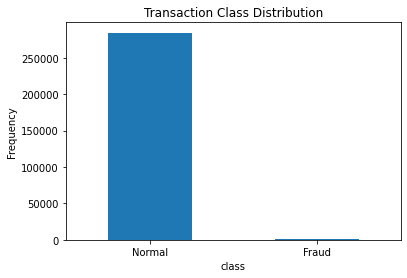

In [14]:
count_classes=pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel('class')
plt.ylabel('Frequency')

In [15]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]

In [16]:
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [25]:
from imblearn.under_sampling import NearMiss

In [33]:
nm=NearMiss(random_state=42)
X_res, y_res=nm.fit_sample(X,y)

TypeError: ignored

In [30]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, y)

In [31]:
X_res.shape, y_res.shape

((984, 30), (984,))

In [34]:
from collections import Counter
print("Original dataset shape {}".format(Counter(y)))
print("Original dataset shape {}".format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Original dataset shape Counter({0: 492, 1: 492})
